In [1]:
import pandas as pd
import numpy as np

# URL untuk dataset multivariate Anda
url_multivariate = "https://raw.githubusercontent.com/adamzakys/SourceFiles/refs/heads/main/DatasetFinal/Dataset%20After%20Preprocessing/df_multivariate.csv"

# Membaca CSV dan menjadikan 'Tanggal' sebagai datetime, lalu urutkan
df_multi_w = pd.read_csv(url_multivariate, parse_dates=['Tanggal']) # _w untuk windowing
df_multi_w = df_multi_w.sort_values(by='Tanggal').reset_index(drop=True)

print("df_multi_w (Multivariate untuk Windowing) berhasil dimuat:")
print(df_multi_w.head())
print(f"Bentuk df_multi_w: {df_multi_w.shape}")
print("-" * 30)

df_multi_w (Multivariate untuk Windowing) berhasil dimuat:
     Tanggal     Price      Open      High       Low      Vol.  Change %  \
0 2018-01-01  0.099273  0.103213  0.101362  0.094943  0.000017  0.618706   
1 2018-01-02  0.111995  0.099272  0.114553  0.095496  0.000031  0.834955   
2 2018-01-03  0.115906  0.111994  0.115781  0.111601  0.000024  0.715310   
3 2018-01-04  0.116134  0.115904  0.115531  0.108323  0.000025  0.671275   
4 2018-01-05  0.133379  0.116133  0.131900  0.114074  0.000032  0.868237   

   EUR_German Unemployment Rate  CNY_CPI (YoY)  \
0                           0.4       0.419355   
1                           0.4       0.419355   
2                           0.4       0.419355   
3                           0.4       0.419355   
4                           0.4       0.419355   

   JPY_BoJ Interest Rate Decision  ...  USD_Core PCE Prices  \
0                             0.0  ...             0.416667   
1                             0.0  ...             0.4166

In [ ]:
# Parameter windowing (bisa Anda definisikan di sini atau di dalam fungsi)
N_INPUT_DAYS = 30
N_OUTPUT_DAYS = 30

def create_windowed_data(df, n_input=N_INPUT_DAYS, n_output=N_OUTPUT_DAYS):
    """Membuat data windowed X dan y sesuai referensi Anda."""
    # Pastikan 'Price' dan 'Tanggal' ada di DataFrame
    if 'Price' not in df.columns or 'Tanggal' not in df.columns:
        # Ini adalah pengecekan dasar yang baik untuk dipertahankan
        raise ValueError("DataFrame harus memiliki kolom 'Price' dan 'Tanggal'.")
        
    feature_cols = df.columns.difference(['Tanggal', 'Price'])
    # Urutan kolom untuk data_array: 'Price' dulu, baru fitur lainnya.
    all_cols_for_array = ['Price'] + feature_cols.tolist() 
    
    data_array = df[all_cols_for_array].values
    dates = df['Tanggal'].values # Untuk y_target_dates

    X_list, y_list, y_dates_list = [], [], [] # Menggunakan y_dates_list agar konsisten

    num_possible_windows = len(df) - n_input - n_output + 1
    if num_possible_windows <= 0:
        print("PERHATIAN: Data tidak cukup panjang untuk membuat window.")
        return np.array(X_list), np.array(y_list), np.array(y_dates_list)

    for i in range(num_possible_windows):
        X_window = data_array[i : i + n_input]
        y_window_target = data_array[i + n_input : i + n_input + n_output, 0] 
        target_dates_for_y = dates[i + n_input : i + n_input + n_output] # Menggunakan nama variabel yang lebih deskriptif

        X_list.append(X_window)
        y_list.append(y_window_target)
        y_dates_list.append(target_dates_for_y) # Menyimpan tanggal target

    X_array = np.array(X_list)
    y_array = np.array(y_list)
    y_target_dates_array = np.array(y_dates_list) # Menggunakan nama variabel yang konsisten dengan output

    return X_array, y_array, y_target_dates_array

# Panggil fungsi create_windowed_data
# Gunakan df_multi_w sebagai input DataFrame
if 'df_multi_w' in locals() and not df_multi_w.empty:
    # Menggunakan nama variabel X, y, y_target_dates seperti di referensi Anda
    X, y, y_target_dates = create_windowed_data(df_multi_w) 

    # Output persis seperti referensi Anda
    print("\nPembuatan data windowed selesai:")
    print("Jumlah total window:", len(X)) # atau X.shape[0]
    if len(X) > 0:
        print("Ukuran setiap X:", X.shape[1:], "=> (n_input hari, jumlah fitur)")
        print("Ukuran setiap y:", y.shape[1:], "=> (n_output hari,)")

        # Contoh satu window:
        print("\nContoh 1 window (X):")
        print(X[0]) # Ini akan mencetak array numpy

        print("\nTarget y untuk window tersebut:")
        print(y[0]) # Ini akan mencetak array numpy

        print("\nTanggal-tanggal prediksi y:")
        # Mengubah array numpy dari datetime64 menjadi array string tanggal yang lebih pendek untuk tampilan
        formatted_target_dates = [np.datetime_as_string(date, unit='D') for date in y_target_dates[0]]
        print(formatted_target_dates)
    else:
        print("Tidak ada window yang terbentuk.")
else:
    print("DataFrame df_multi_w belum dimuat atau kosong. Proses windowing tidak dilakukan.")
    # Inisialisasi agar variabel ada jika gagal
    X, y, y_target_dates = np.array([]), np.array([]), np.array([])
print("-" * 30)


Pembuatan data windowed selesai:
Jumlah total window: 2498
Ukuran setiap X: (30, 20) => (n_input hari, jumlah fitur)
Ukuran setiap y: (30,) => (n_output hari,)

Contoh 1 window (X):
[[9.92729584e-02 4.19354839e-01 1.00000000e+00 1.00000000e+00
  6.18706264e-01 4.00000000e-01 7.76699029e-02 5.00000000e-01
  1.01361818e-01 3.41463415e-01 0.00000000e+00 1.96969697e-01
  9.49433122e-02 1.03213325e-01 3.66666667e-01 1.33333333e-01
  4.16666667e-01 2.38095238e-01 1.66666667e-01 1.74876968e-05]
 [1.11994729e-01 4.19354839e-01 1.00000000e+00 1.00000000e+00
  8.34954770e-01 4.00000000e-01 7.76699029e-02 5.00000000e-01
  1.14553184e-01 3.41463415e-01 0.00000000e+00 1.96969697e-01
  9.54962926e-02 9.92720973e-02 3.66666667e-01 1.33333333e-01
  4.16666667e-01 2.38095238e-01 1.66666667e-01 3.07539168e-05]
 [1.15905906e-01 4.19354839e-01 1.00000000e+00 1.00000000e+00
  7.15309780e-01 4.00000000e-01 7.76699029e-02 5.00000000e-01
  1.15781240e-01 3.41463415e-01 0.00000000e+00 1.96969697e-01
  1.11601

In [3]:
def split_windowed_data(X_input, y_input, y_dates_input, train_ratio=0.85, val_ratio=0.10):
    """
    Membagi dataset windowed (X, y, y_dates) menjadi training (85%), 
    validation (10%), dan testing (5%) secara kronologis.
    """
    total_windows = X_input.shape[0]
    if total_windows == 0:
        print("PERHATIAN: Tidak ada data windowed untuk di-split.")
        empty_array = np.array([])
        return (empty_array, empty_array, empty_array), \
               (empty_array, empty_array, empty_array), \
               (empty_array, empty_array, empty_array)

    train_end = int(total_windows * train_ratio)
    val_end = int(total_windows * (train_ratio + val_ratio))

    X_train, y_train, y_dates_train = X_input[:train_end], y_input[:train_end], y_dates_input[:train_end]
    X_val, y_val, y_dates_val = X_input[train_end:val_end], y_input[train_end:val_end], y_dates_input[train_end:val_end]
    X_test, y_test, y_dates_test = X_input[val_end:], y_input[val_end:], y_dates_input[val_end:]
    
    return (X_train, y_train, y_dates_train), \
           (X_val, y_val, y_dates_val), \
           (X_test, y_test, y_dates_test)

# Panggil fungsi split untuk data windowed
# Pastikan X, y, y_target_dates sudah ada dari Blok 2
# (Di notebook Anda, variabelnya mungkin X_windowed, y_windowed, dll. Sesuaikan jika perlu)
if 'X' in locals() and X.shape[0] > 0:
    (X_train, y_train, y_dates_train), \
    (X_val, y_val, y_dates_val), \
    (X_test, y_test, y_dates_test) = split_windowed_data(
        X, y, y_target_dates
    )

    # Cek hasilnya
    print("\nSplit dataset windowed berhasil:")
    if X_train.shape[0] > 0:
        train_start_date_str = np.datetime_as_string(y_dates_train[0,0], unit='D')
        train_end_date_str = np.datetime_as_string(y_dates_train[-1,-1], unit='D')
        print(f"- Training   : {X_train.shape[0]} window, periode target y dari {train_start_date_str} s.d. {train_end_date_str}")
    else:
        print(f"- Training   : {X_train.shape[0]} window")

    if X_val.shape[0] > 0:
        val_start_date_str = np.datetime_as_string(y_dates_val[0,0], unit='D')
        val_end_date_str = np.datetime_as_string(y_dates_val[-1,-1], unit='D')
        print(f"- Validation : {X_val.shape[0]} window, periode target y dari {val_start_date_str} s.d. {val_end_date_str}")
    else:
        print(f"- Validation : {X_val.shape[0]} window")

    if X_test.shape[0] > 0:
        test_start_date_str = np.datetime_as_string(y_dates_test[0,0], unit='D')
        test_end_date_str = np.datetime_as_string(y_dates_test[-1,-1], unit='D')
        print(f"- Testing    : {X_test.shape[0]} window, periode target y dari {test_start_date_str} s.d. {test_end_date_str}")
    else:
        print(f"- Testing    : {X_test.shape[0]} window")
else:
    print("Tidak ada data windowed yang dihasilkan untuk di-split.")
    X_train, y_train, y_dates_train = np.array([]), np.array([]), np.array([])
    X_val, y_val, y_dates_val = np.array([]), np.array([]), np.array([])
    X_test, y_test, y_dates_test = np.array([]), np.array([]), np.array([])

print("-" * 30)


Split dataset windowed berhasil:
- Training   : 2123 window, periode target y dari 2018-01-31 s.d. 2023-12-22
- Validation : 250 window, periode target y dari 2023-11-24 s.d. 2024-08-28
- Testing    : 125 window, periode target y dari 2024-07-31 s.d. 2024-12-31
------------------------------


Blok 4: Pengaturan Random Seed dan Definisi Arsitektur Model LSTM

In [4]:
import tensorflow as tf
import os
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

def set_seeds(seed=42):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
    tf.config.experimental.enable_op_determinism()

set_seeds()
print("Random seed telah diatur untuk memastikan hasil yang dapat direproduksi.")

def build_lstm_model(input_shape, output_size, num_units, dropout_rate, learning_rate):
    model = Sequential([
        LSTM(num_units, return_sequences=True, input_shape=input_shape, activation='tanh'),
        Dropout(dropout_rate),
        LSTM(num_units, return_sequences=False, activation='tanh'),
        Dropout(dropout_rate),
        Dense(output_size, activation='linear')
    ])
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mse'])
    
    return model

print("Fungsi build_lstm_model berhasil didefinisikan.")
print("-" * 30)

Random seed telah diatur untuk memastikan hasil yang dapat direproduksi.
Fungsi build_lstm_model berhasil didefinisikan.
------------------------------


Blok 5: Pencarian Hyperparameter (Grid Search)

In [5]:
import itertools
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping

param_grid = {
    'units': [50, 75, 100],
    'learning_rate': [0.0001, 0.001, 0.01],
    'batch_size': [16, 32, 64],
    'dropout_rate': [0.1, 0.2]
}

EPOCHS_MAX = 200
PATIENCE = 15

all_combinations = list(itertools.product(
    param_grid['units'],
    param_grid['learning_rate'],
    param_grid['batch_size'],
    param_grid['dropout_rate']
))

print(f"Total kombinasi hyperparameter yang akan diuji: {len(all_combinations)}")

history_results_mw = []

if 'X_train' in locals() and X_train.size > 0:
    for idx, params in enumerate(all_combinations):
        units, lr, batch_size, dropout = params
        
        print(f"\n--- Menguji Kombinasi {idx + 1}/{len(all_combinations)} ---")
        print(f"Params: Units={units}, LR={lr}, BatchSize={batch_size}, Dropout={dropout}")

        model_mw = build_lstm_model(
            input_shape=(X_train.shape[1], X_train.shape[2]),
            output_size=y_train.shape[1],
            num_units=units,
            dropout_rate=dropout,
            learning_rate=lr
        )

        early_stopping = EarlyStopping(monitor='val_loss', patience=PATIENCE, restore_best_weights=True, verbose=0)

        history = model_mw.fit(
            X_train, y_train,
            epochs=EPOCHS_MAX,
            batch_size=batch_size,
            validation_data=(X_val, y_val),
            callbacks=[early_stopping],
            verbose=0,
            shuffle=False
        )
        
        best_val_loss = min(history.history['val_loss'])
        actual_epochs = early_stopping.stopped_epoch if early_stopping.stopped_epoch > 0 else EPOCHS_MAX

        print(f"Selesai pada epoch: {actual_epochs}. Val Loss Terbaik: {best_val_loss:.6f}")

        history_results_mw.append({
            'combination': idx + 1,
            'units': units,
            'learning_rate': lr,
            'batch_size': batch_size,
            'dropout_rate': dropout,
            'best_val_loss': best_val_loss,
            'stopped_epoch': actual_epochs
        })

    print("\n--- Pencarian Hyperparameter Selesai ---")

else:
    print("Variabel data training (X_train) tidak ditemukan atau kosong. Proses dilewati.")

Total kombinasi hyperparameter yang akan diuji: 54

--- Menguji Kombinasi 1/54 ---
Params: Units=50, LR=0.0001, BatchSize=16, Dropout=0.1


d:\Code Penelitian new\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Selesai pada epoch: 45. Val Loss Terbaik: 0.032580

--- Menguji Kombinasi 2/54 ---
Params: Units=50, LR=0.0001, BatchSize=16, Dropout=0.2
Selesai pada epoch: 47. Val Loss Terbaik: 0.019579

--- Menguji Kombinasi 3/54 ---
Params: Units=50, LR=0.0001, BatchSize=32, Dropout=0.1
Selesai pada epoch: 51. Val Loss Terbaik: 0.011127

--- Menguji Kombinasi 4/54 ---
Params: Units=50, LR=0.0001, BatchSize=32, Dropout=0.2
Selesai pada epoch: 56. Val Loss Terbaik: 0.021095

--- Menguji Kombinasi 5/54 ---
Params: Units=50, LR=0.0001, BatchSize=64, Dropout=0.1
Selesai pada epoch: 56. Val Loss Terbaik: 0.015631

--- Menguji Kombinasi 6/54 ---
Params: Units=50, LR=0.0001, BatchSize=64, Dropout=0.2
Selesai pada epoch: 69. Val Loss Terbaik: 0.019168

--- Menguji Kombinasi 7/54 ---
Params: Units=50, LR=0.001, BatchSize=16, Dropout=0.1
Selesai pada epoch: 21. Val Loss Terbaik: 0.007074

--- Menguji Kombinasi 8/54 ---
Params: Units=50, LR=0.001, BatchSize=16, Dropout=0.2
Selesai pada epoch: 21. Val Loss Ter

In [6]:
import pandas as pd

if 'history_results_mw' in locals() and history_results_mw:
    results_df_mw = pd.DataFrame(history_results_mw)
    results_df_mw = results_df_mw.sort_values(by='best_val_loss', ascending=True)

    print("\n--- Analisis Hasil Pencarian Hyperparameter (Multivariat dengan Windowing) ---")
    print("\nTop 5 Kombinasi Hyperparameter Terbaik (berdasarkan Validation Loss):")
    print(results_df_mw.head(5).to_string())

    output_filename_mw = 'grid_search_results_multivariate_windowing.csv'
    results_df_mw.to_csv(output_filename_mw, index=False)
    print(f"\nHasil lengkap dari {len(all_combinations)} kombinasi disimpan ke '{output_filename_mw}'")

else:
    print("Tidak ada hasil pencarian hyperparameter (history_results_mw) untuk dianalisis.")
    results_df_mw = pd.DataFrame()

print("-" * 30)


--- Analisis Hasil Pencarian Hyperparameter (Multivariat dengan Windowing) ---

Top 5 Kombinasi Hyperparameter Terbaik (berdasarkan Validation Loss):
    combination  units  learning_rate  batch_size  dropout_rate  best_val_loss  stopped_epoch
29           30     75          0.001          64           0.2       0.004673             76
26           27     75          0.001          32           0.1       0.005365             21
44           45    100          0.001          32           0.1       0.005515             33
9            10     50          0.001          32           0.2       0.006241             43
45           46    100          0.001          32           0.2       0.006255             33

Hasil lengkap dari 54 kombinasi disimpan ke 'grid_search_results_multivariate_windowing.csv'
------------------------------


--- Hyperparameter Terbaik Terpilih (Multivariat dengan Windowing) ---
    combination  units  learning_rate  batch_size  dropout_rate  best_val_loss  stopped_epoch
29         30.0   75.0          0.001        64.0           0.2       0.004673           76.0
--------------------------------------------------

Membangun model final dengan hyperparameter terbaik...


d:\Code Penelitian new\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_58"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_116 (LSTM)                 │ (None, 30, 75)         │        28,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_116 (Dropout)           │ (None, 30, 75)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_117 (LSTM)                 │ (None, 75)             │        45,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_117 (Dropout)           │ (None, 75)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 30)             │         2,280 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 76,380 (298.36 KB)

 Trainable params: 76,380 (298.36 KB)

 Non-trainable params: 0 (0.00 B)


--- Memulai Pelatihan Model Final ---
Epoch 1/76
32/34 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0217 - mse: 0.0217
Epoch 1: val_loss improved from inf to 0.10950, saving model to final_model_multivariate_windowing.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0228 - mse: 0.0228 - val_loss: 0.1095 - val_mse: 0.1095
Epoch 2/76
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0222 - mse: 0.0222
Epoch 2: val_loss improved from 0.10950 to 0.05327, saving model to final_model_multivariate_windowing.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0533 - val_mse: 0.0533
Epoch 3/76
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0105 - mse: 0.0105
Epoch 3: val_loss improved from 0.05327 to 0.02008, saving model to final_model_multivariate_windowing.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0201 - val_mse: 0.0201
Epoch 4/76
32/34 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0090 - mse: 0.0090
Epoch 4: val_loss improved from 0.02008 to 0.01087, saving model to final_model_multivariate_windowing.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 5/76
32/34 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0175 - mse: 0.0175
Epoch 5: val_loss did not improve from 0.01087
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0274 - val_mse: 0.0274
Epoch 6/76
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037 - mse: 0.0037
Epoch 6: val_loss did not improve from 0.01087
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.1009 - val_mse: 0.1009
Epoch 7/76
32/34 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0077 - mse: 0.0077
Epoch 7: val_loss did not improve from 0.01087
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0656 - val_mse: 0.0656
Epoch 8/76
32/34 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0074 - mse: 0.0074
Epoch 8: val_loss improved from 0.01087 to 0.01011, saving model to final_model_multivariate_windowing.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 9/76
33/34 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0078 - mse: 0.0078
Epoch 9: val_loss did not improve from 0.01011
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0510 - val_mse: 0.0510
Epoch 10/76
32/34 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028 - mse: 0.0028
Epoch 10: val_loss did not improve from 0.01011
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0497 - val_mse: 0.0497
Epoch 11/76
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0036 - mse: 0.0036
Epoch 11: val_loss did not improve from 0.01011
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0225 - val_mse: 0.0225
Epoch 12/76
32/34 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030 - mse: 0.0030
Epoch 12: val_loss improved from 0.01011 to 0.00879, saving model to final_model_multivariate_windowing.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 13/76
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0046 - mse: 0.0046
Epoch 13: val_loss did not improve from 0.00879
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0731 - val_mse: 0.0731
Epoch 14/76
32/34 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0031 - mse: 0.0031
Epoch 14: val_loss did not improve from 0.00879
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0315 - val_mse: 0.0315
Epoch 15/76
32/34 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025 - mse: 0.0025
Epoch 15: val_loss did not improve from 0.00879
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 16/76
33/34 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025 - mse: 0.0025
Epoch 16: val_loss did not improve from 0.00879
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0026 - mse

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 59/76
33/34 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0019 - mse: 0.0019
Epoch 59: val_loss did not improve from 0.00798
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0380 - val_mse: 0.0380
Epoch 60/76
32/34 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023 - mse: 0.0023
Epoch 60: val_loss did not improve from 0.00798
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 61/76
32/34 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0013 - mse: 0.0013
Epoch 61: val_loss did not improve from 0.00798
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 62/76
32/34 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0011 - mse: 0.0011      
Epoch 62: val_loss did not improve from 0.00798
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0012

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 72/76
33/34 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026 - mse: 0.0026
Epoch 72: val_loss did not improve from 0.00638
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0543 - val_mse: 0.0543
Epoch 73/76
32/34 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030 - mse: 0.0030
Epoch 73: val_loss did not improve from 0.00638
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0269 - val_mse: 0.0269
Epoch 74/76
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0014 - mse: 0.0014
Epoch 74: val_loss did not improve from 0.00638
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 75/76
32/34 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0012 - mse: 0.0012  
Epoch 75: val_loss did not improve from 0.00638
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0013 - m

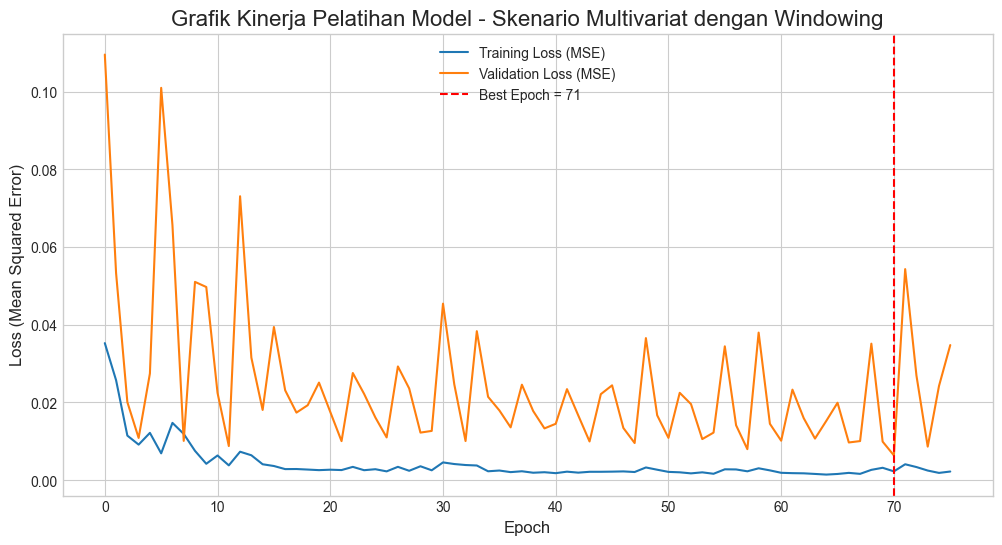


Memuat model terbaik dari file: final_model_multivariate_windowing.h5
Model terbaik berhasil dimuat.
------------------------------


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint

# Pastikan results_df_mw dari Blok 6 sudah ada dan tidak kosong
if 'results_df_mw' in locals() and not results_df_mw.empty:
    # Ambil hyperparameter terbaik dari baris pertama results_df_mw
    best_params_mw = results_df_mw.iloc[0]
    print("--- Hyperparameter Terbaik Terpilih (Multivariat dengan Windowing) ---")
    print(best_params_mw.to_frame().T.to_string())
    print("-" * 50)

    # Bangun model final dengan hyperparameter terbaik
    print("\nMembangun model final dengan hyperparameter terbaik...")
    final_model_mw = build_lstm_model(
        input_shape=(X_train.shape[1], X_train.shape[2]),
        output_size=y_train.shape[1],
        num_units=int(best_params_mw['units']),
        dropout_rate=best_params_mw['dropout_rate'],
        learning_rate=best_params_mw['learning_rate']
    )
    final_model_mw.summary()

    # Definisikan callbacks untuk pelatihan final
    final_model_path_mw = 'final_model_multivariate_windowing.h5'
    early_stopping_final = EarlyStopping(monitor='val_loss', patience=PATIENCE, restore_best_weights=True, verbose=1)
    model_checkpoint_final = ModelCheckpoint(filepath=final_model_path_mw, monitor='val_loss', save_best_only=True, verbose=1)
    # Ambil jumlah epoch terbaik dari hasil grid search
    best_epoch_from_search = int(best_params_mw['stopped_epoch'])

    # Latih model final
    print("\n--- Memulai Pelatihan Model Final ---")
    history_final_mw = final_model_mw.fit(
        X_train, y_train,
        epochs=best_epoch_from_search,
        batch_size=int(best_params_mw['batch_size']),
        validation_data=(X_val, y_val),
        # callbacks=[early_stopping_final, model_checkpoint_final],
        callbacks=[model_checkpoint_final],
        verbose=1,
        shuffle=False
    )

    # Membuat Grafik Kinerja Pelatihan (Loss vs Epoch)
    print("\n--- Membuat Grafik Kinerja Pelatihan (Loss vs Epoch) ---")
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(12, 6))
    plt.plot(history_final_mw.history['loss'], label='Training Loss (MSE)')
    plt.plot(history_final_mw.history['val_loss'], label='Validation Loss (MSE)')
    plt.title('Grafik Kinerja Pelatihan Model - Skenario Multivariat dengan Windowing', fontsize=16)
    plt.ylabel('Loss (Mean Squared Error)', fontsize=12)
    plt.xlabel('Epoch', fontsize=12)
    plt.legend(loc='upper right', fontsize=10)
    best_epoch = np.argmin(history_final_mw.history['val_loss']) + 1
    plt.axvline(x=best_epoch-1, color='r', linestyle='--', label=f'Best Epoch = {best_epoch}')
    plt.legend()
    plt.show()

    # Muat kembali model terbaik yang disimpan
    print(f"\nMemuat model terbaik dari file: {final_model_path_mw}")
    final_model_mw = load_model(
        final_model_path_mw, 
        custom_objects={'mse': tf.keras.losses.MeanSquaredError()}
    )
    print("Model terbaik berhasil dimuat.")

else:
    print("DataFrame hasil grid search (results_df_mw) tidak ditemukan. Proses dilewati.")

print("-" * 30)

--- Memulai Evaluasi Final, Prediksi, dan Analisis Error (Multivariat dengan Windowing) ---


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
- Test MSE (Skala Ternormalisasi): 0.015721
- Detail prediksi untuk 125 sampel disimpan ke 'detailed_predictions_multivariate_windowing.csv'

--- Analisis Rata-rata Error per Hari Prediksi (30 Hari Horizon) ---
- Prediksi paling akurat (MSE terendah) terjadi pada : Hari ke-1
- Prediksi paling tidak akurat (MSE tertinggi) terjadi pada: Hari ke-28


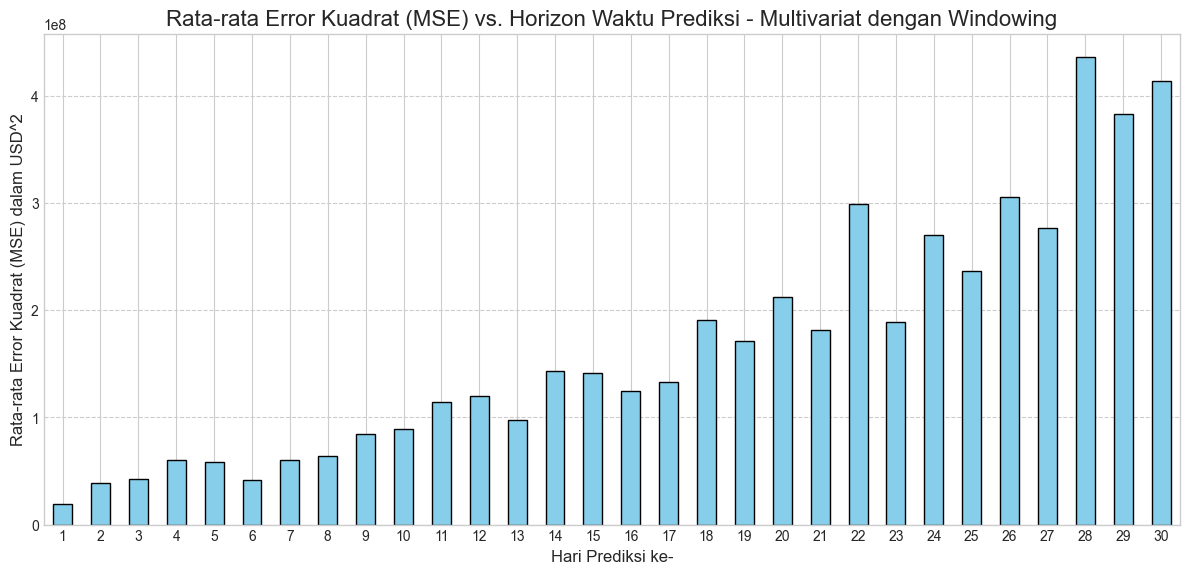


--- Visualisasi Grafik Sampel Prediksi vs Aktual ---


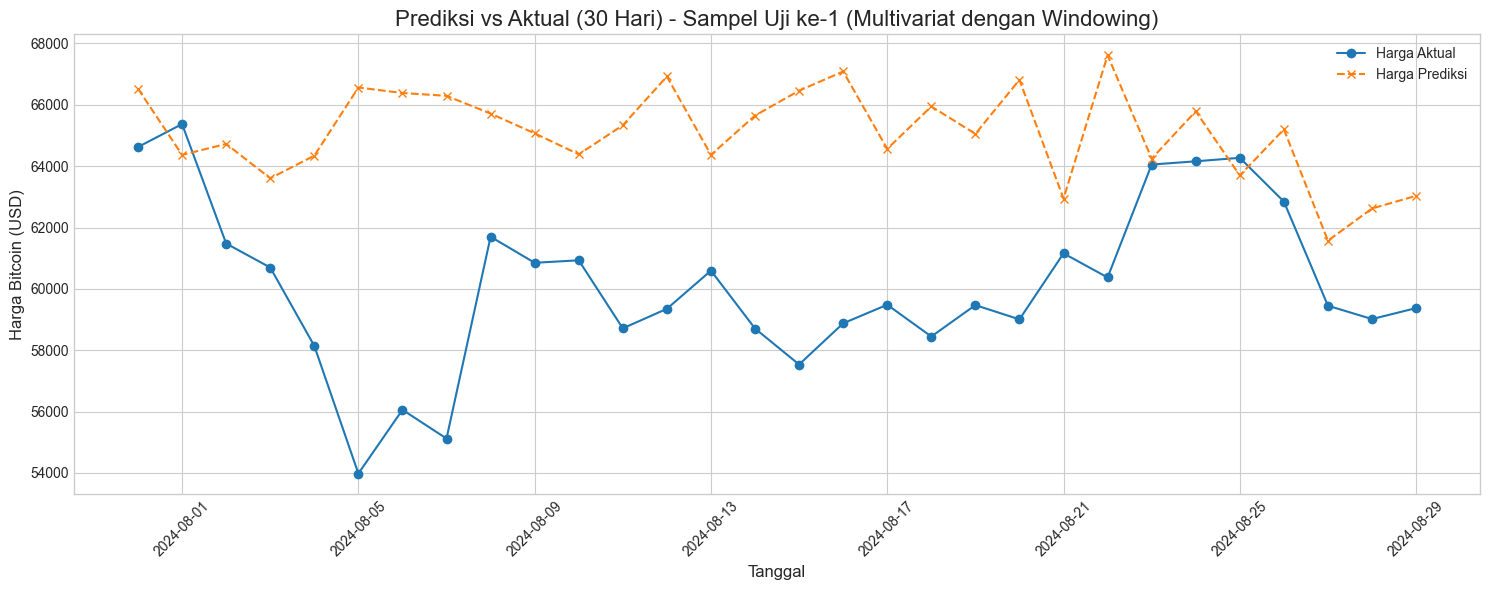

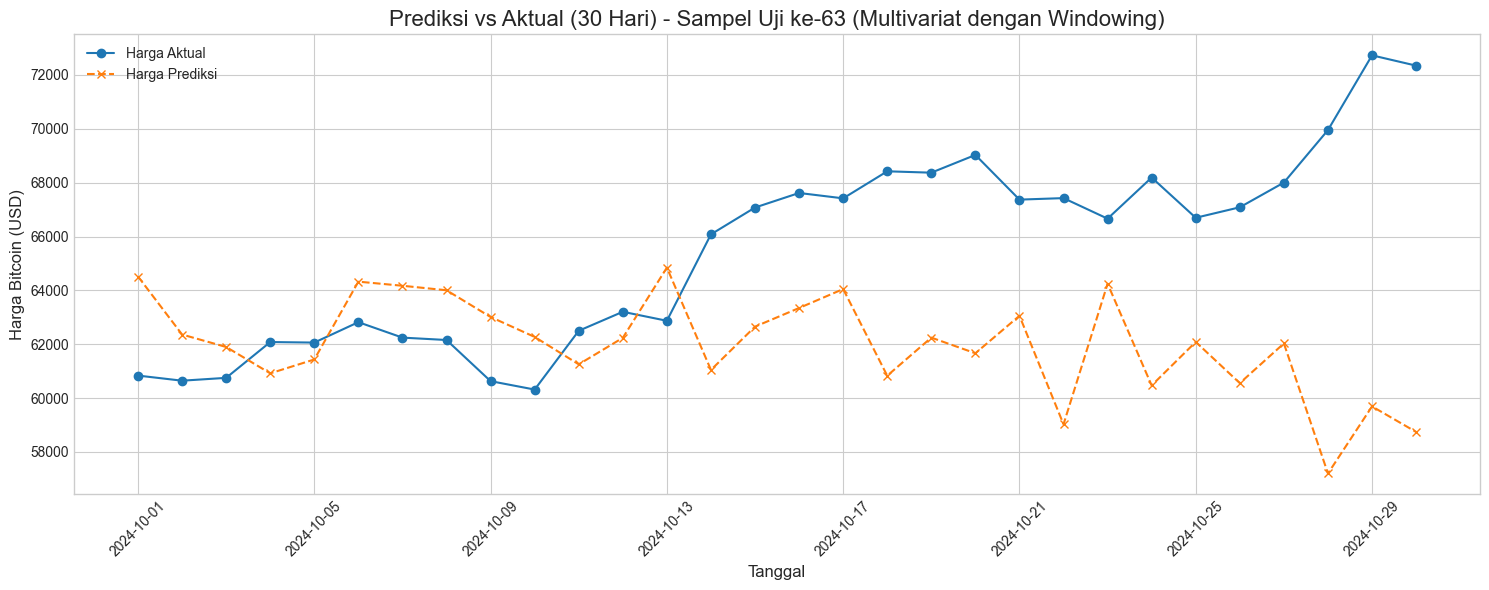

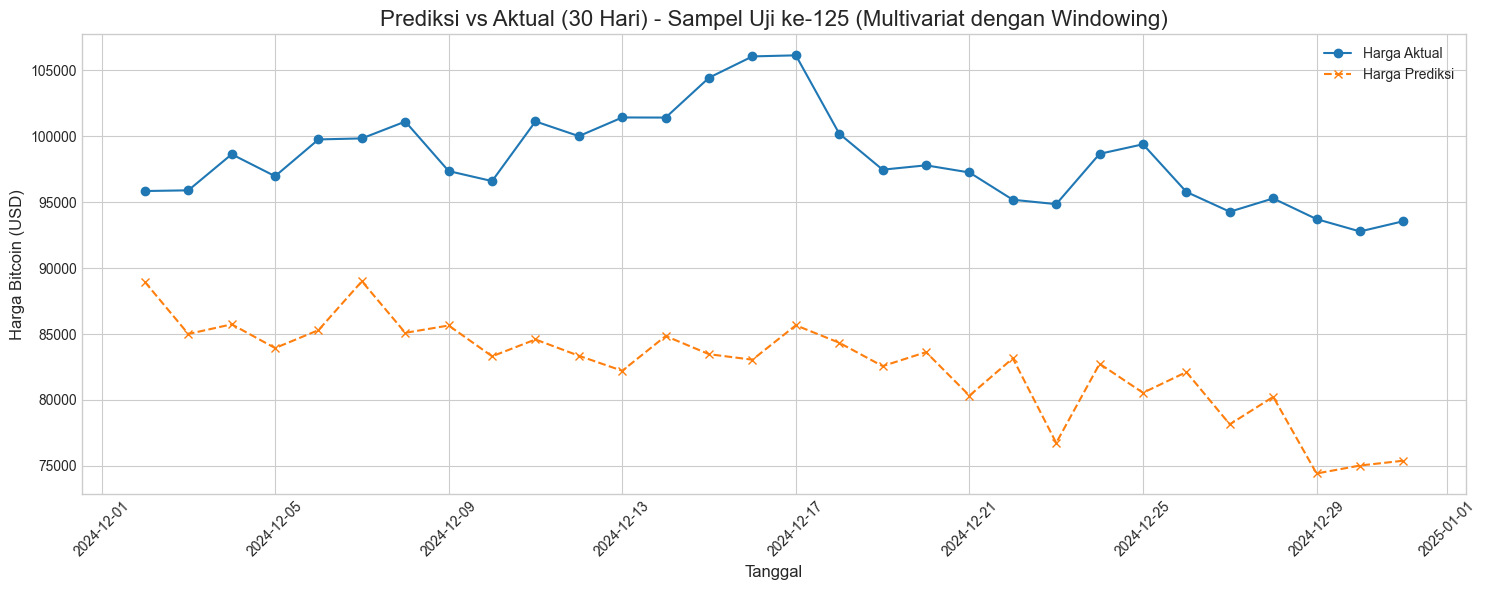

------------------------------
Proses untuk Skenario Multivariat dengan Windowing Selesai.


In [19]:
import joblib
from sklearn.metrics import mean_squared_error

# Pastikan model final dan data uji sudah ada
if 'final_model_mw' in locals() and final_model_mw is not None and 'X_test' in locals() and X_test.size > 0:
    print("--- Memulai Evaluasi Final, Prediksi, dan Analisis Error (Multivariat dengan Windowing) ---")

    try:
        # 1. Lakukan Prediksi dan Denormalisasi
        scaler_target_path = '../scaler_target.pkl'
        scaler_target = joblib.load(scaler_target_path)
        y_pred_scaled = final_model_mw.predict(X_test)
        y_pred_denorm = scaler_target.inverse_transform(y_pred_scaled)
        y_test_denorm = scaler_target.inverse_transform(y_test)
        
        # 2. Hitung MSE Keseluruhan pada Data Uji
        # mse_real_scale = mean_squared_error(y_test_denorm, y_pred_denorm)
        # print(f"\n- Test MSE Keseluruhan (Skala Asli USD^2): {mse_real_scale:,.2f}")
        mse_normalized = mean_squared_error(y_test, y_pred_scaled)
        print(f"- Test MSE (Skala Ternormalisasi): {mse_normalized:.6f}")


        # 3. Simpan dan Analisis Detail Prediksi per Sampel
        all_predictions_list = []
        for i in range(len(X_test)):
            date_range = pd.to_datetime(y_dates_test[i])
            
            sample_df = pd.DataFrame({
                'Sample_Uji_ke': i + 1,
                'Hari_Prediksi_ke': np.arange(1, N_OUTPUT_DAYS + 1),
                'Tanggal': date_range,
                'Harga_Aktual': y_test_denorm[i],
                'Harga_Prediksi': y_pred_denorm[i]
            })
            all_predictions_list.append(sample_df)
            
        all_predictions_df = pd.concat(all_predictions_list, ignore_index=True)
        all_predictions_df['Error_Kuadrat'] = (all_predictions_df['Harga_Prediksi'] - all_predictions_df['Harga_Aktual'])**2
        
        output_predictions_file = 'detailed_predictions_multivariate_windowing.csv'
        all_predictions_df.to_csv(output_predictions_file, index=False, float_format='%.2f')
        print(f"- Detail prediksi untuk {len(X_test)} sampel disimpan ke '{output_predictions_file}'")

        # 4. Analisis Rata-rata Error per Hari Prediksi
        print("\n--- Analisis Rata-rata Error per Hari Prediksi (30 Hari Horizon) ---")
        mse_per_day = all_predictions_df.groupby('Hari_Prediksi_ke')['Error_Kuadrat'].mean()
        
        min_error_day = mse_per_day.idxmin()
        max_error_day = mse_per_day.idxmax()
        
        print(f"- Prediksi paling akurat (MSE terendah) terjadi pada : Hari ke-{min_error_day}")
        print(f"- Prediksi paling tidak akurat (MSE tertinggi) terjadi pada: Hari ke-{max_error_day}")
        
        # Visualisasi Kurva Error
        plt.figure(figsize=(12, 6))
        mse_per_day.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title('Rata-rata Error Kuadrat (MSE) vs. Horizon Waktu Prediksi - Multivariat dengan Windowing', fontsize=16)
        plt.xlabel('Hari Prediksi ke-', fontsize=12)
        plt.ylabel('Rata-rata Error Kuadrat (MSE) dalam USD^2', fontsize=12)
        plt.xticks(rotation=0)
        plt.grid(axis='y', linestyle='--')
        plt.tight_layout()
        plt.show()

        # 5. Visualisasi Grafik Sampel
        print("\n--- Visualisasi Grafik Sampel Prediksi vs Aktual ---")
        sample_indices_to_plot = [0, len(X_test) // 2, len(X_test) - 1]
        for sample_index in sample_indices_to_plot:
            plot_df = all_predictions_df[all_predictions_df['Sample_Uji_ke'] == sample_index + 1]
            
            plt.figure(figsize=(15, 6))
            plt.plot(plot_df['Tanggal'], plot_df['Harga_Aktual'], label='Harga Aktual', marker='o')
            plt.plot(plot_df['Tanggal'], plot_df['Harga_Prediksi'], label='Harga Prediksi', marker='x', linestyle='--')
            plt.title(f'Prediksi vs Aktual (30 Hari) - Sampel Uji ke-{sample_index+1} (Multivariat dengan Windowing)', fontsize=16)
            plt.ylabel('Harga Bitcoin (USD)', fontsize=12)
            plt.xlabel('Tanggal', fontsize=12)
            plt.xticks(rotation=45)
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()

    except Exception as e:
        print(f"Terjadi error pada proses evaluasi atau visualisasi: {e}")
else:
    print("Model atau data uji tidak tersedia untuk dievaluasi.")

print("-" * 30)
print("Proses untuk Skenario Multivariat dengan Windowing Selesai.")

In [20]:
# Simpan data rata-rata error per hari prediksi ke CSV
mse_per_day_df = mse_per_day.reset_index()
mse_per_day_df.columns = ['Hari_Prediksi_ke', 'Rata_rata_Error_Kuadrat']

output_mse_per_day_file = 'mse_per_day_multivariate_windowing.csv'
mse_per_day_df.to_csv(output_mse_per_day_file, index=False, float_format='%.2f')
print(f"Data rata-rata error per hari prediksi disimpan ke '{output_mse_per_day_file}'")

Data rata-rata error per hari prediksi disimpan ke 'mse_per_day_multivariate_windowing.csv'
